# Basic Julia Tutorial

# Running/Installing Julia

1. To run Julia without a local installation, use [JuliaBox](https://JuliaBox.com) or [CoCalc](https://cocalc.com).

2. To install Julia on your machine, [download Julia](https://julialang.org/downloads/). You may also want to use the Atom editor with the [Juno IDE](http://junolab.org/). To run IJulia with either jupyter or nteract from your local installation, see [IJulia](https://github.com/JuliaLang/IJulia.jl) for instructions.

3. Instead of downloading and installing Julia and IJulia yourself, you may want to try [JuliaPro](https://juliacomputing.com/products/juliapro.html.)

# Documentation and Help

1.  Cheat sheet at [QuantEcon](https://cheatsheets.quantecon.org/julia-cheatsheet.html)
2.  [Wiki book](https://en.wikibooks.org/wiki/Introducing_Julia)
3.  The [official Julia on-line manual](https://docs.julialang.org)
4.  Discussion lists are found at
    *  https://discourse.julialang.org/
    *  https://stackoverflow.com/questions/tagged/julia-lang
    *  https://www.reddit.com/r/Julia/
    *  https://gitter.im/JuliaLang/julia
5. In Julia, do ```? cos``` to get help with the cos function    

# About Notebooks

This cell is a "Markdown" cell. This is meant for comments and documentation, not computations.

You can change a cell to "Code" or "Markdown" in the menu.

Markdown cells can handle LaTeX. An example: $\alpha = \beta/2$. A Markdown cell can also contain some *formatting*, like lists of this kind

1. To insert a new cell, use the menu. 

2. The next cell is "Code". You can run it. Text after a # sign is treated as a comment.

3. The subsequent cell shows how to get help on a command.

In [1]:
a = 2                  #this is a comment
                       #run this cell by using the menu, or by Shift+Enter  

2

In [2]:
? cos                  #to get help on the cos() function 

search: cos cosh cosd cosc cospi acos acosh acosd sincos const close isconst



```
cos(x)
```

Compute cosine of `x`, where `x` is in radians.

---

```
cos(A::AbstractMatrix)
```

Compute the matrix cosine of a square matrix `A`.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the cosine. Otherwise, the cosine is determined by calling [`exp`](@ref).

# Examples

```jldoctest
julia> cos(fill(1.0, (2,2)))
2×2 Array{Float64,2}:
  0.291927  -0.708073
 -0.708073   0.291927
```


# Load Packages

There are many packages for Julia, for instance, for plotting or statistical methods (see http://pkg.julialang.org/ for a list). To install a package, you do either 

1. (works everywhere) run `import Pkg` and then `Pkg.add("Packagename")`

2. (works in the Julia console, REPL) enter the "package manager mode" by typing `]`, then run `add PackageName`. You leave the package manager mode by ctrl-c or backspace.

Once a package is installed, you can use it by running

```
using PackageName
```

In [3]:
using Dates                  

include("printmat.jl")      #just a function for prettier matrix printing

printyellow (generic function with 1 method)

In [4]:
using Plots                 #this loads the Plots package

#pyplot(size=(600,400))    #choice of plotting backend
gr(size=(480,320))
default(fmt = :svg)        #try :png or :svg 

# Scalars and Matrices



### Create a Scalar and a Matrix

In [5]:
q = 1                             #create a scalar
Q = [ 1 2 3;                      #create 2x3 matrix
      4 5 6 ] 
println("q is a scalar. To print, use println() or printlnPs()")    
println(q)

println("\nQ is a matrix. To print, use display() or printmat()") 
printmat(Q)                       #case sensitive (q and Q are different)
                                  #the \n adds a line break   

q is a scalar. To print, use println() or printlnPs()
1

Q is a matrix. To print, use display() or printmat()
         1         2         3
         4         5         6



### Picking Out Parts of a Matrix

In [6]:
println("\n","element [1,2] of Q: ",            #commands continue on
        Q[1,2])                                 #the next line (until fisnished)

println("\ncolumns 2 and 3 of Q: ")
printmat(Q[:,2:3])

println("\nline 1 of Q (as a vector): ")
printmat(Q[1,:])


element [1,2] of Q: 2

columns 2 and 3 of Q: 
         2         3
         5         6


line 1 of Q (as a vector): 
         1
         2
         3



### Basic Linear Algebra

The syntax for linear algebra is similar to the standard text book approach. For instance, 
* `Q'Q` (or `Q'*Q`) multiplies the transpose ($Q'$) with the matrix ($Q$)
* `A*B` does matrix multiplication
* `100*Q` multiplies each element of the matrix ($Q$) by 100

However, to add a scalar to each element of a matrix, use `100 .+ Q`. Notice the dot.

In [7]:
println("transpose of Q:")
printmat(Q')

println("Q'Q:")
printmat(Q'Q)

println("scalar * matrix:")
printmat(100*Q)

println("scalar .+ matrix:")                        #notice the dot
printmat(100 .+ Q)

transpose of Q:
         1         4
         2         5
         3         6

Q'Q:
        17        22        27
        22        29        36
        27        36        45

scalar * matrix:
       100       200       300
       400       500       600

scalar .+ matrix:
       101       102       103
       104       105       106



### Creating a Sequence and a Vector

In [8]:
θ = 1:10:21                  #a sequence (range), type \theta + TAB to get this symbol        
println("\n","θ is a sequence: ",θ)

ρ = collect(θ)               #make the sequence into a vector, \rho+TAB
println("\n","ρ is a vector: ")
printmat(ρ)


θ is a sequence: 1:10:21

ρ is a vector: 
         1
        11
        21



# Comparing Things

To see if the scalar z <= 0, do 
```
vv = z <= 0
```
to get a single output (true or false).

Instead, if x is an array, do 
```
vv = x .<= 0                      #notice the dot.
```
to get an array of outputs (same dimension as x)

In [9]:
x =  [-1.5,-1.0,-0.5,0,0.5]             #this is a vector

println("x values: ")
printmat(x)

vv = -1 .< x .<= 0                      #true for x values (-1,0], vv is a vector
println("true if x is in (-1,0]: ")
printmat(vv)

x2 = x[vv]                              #x values for which vv==true
println("x values that are in (-1,0]: ")
printmat(x2)

x values: 
    -1.500
    -1.000
    -0.500
     0.000
     0.500

true if x is in (-1,0]: 
         0
         0
         1
         1
         0

x values that are in (-1,0]: 
    -0.500
     0.000



# Finding Things

can be done by, for instance, `findfirst()`, `findall()` and `indexin()`

In [10]:
x =  [-1.5,-1.0,-0.5,0,0.5]             #this is a vector

println("x values: ")
printmat(x)

v1 = findfirst(x.==0)
println("(first) index v in x such x[v]==0: ",v1)

v2 = findall(x.>=0)
println("\nall indices v in x such x[v]>=0: ")
printmat(v2)

y = [-1.0,0]
v3 = indexin(y,x)
println("\nindices in x so that x[v] equals the vector y=$y: ")
printmat(v3)

x values: 
    -1.500
    -1.000
    -0.500
     0.000
     0.500

(first) index v in x such x[v]==0: 4

all indices v in x such x[v]>=0: 
         4
         5


indices in x so that x[v] equals the vector y=[-1.0, 0.0]: 
         2
         4



# If-then-else

allows you to run different commands depending on a condition which you specify.

In [11]:
z = 1.05

if 1 <= z <= 2          #(a) if true, run the next command (y=z) and then jump to end
    y = z
elseif z < 1            #(b) if (a) is false, try this instead  
    y = 1
else                    #(c) if also (b) is false, do this
    y = 2
end    

println(y)

1.05


# Loops

The are two types of loops: "for loops" and "while loops". 

The *for loop* is best when you know how many times you want to loop (for instance, over all $m$ rows in a matrix). 

The *while loop* is best when you want to keep looping until something happens, for instance, that $x_0$ and $x_1$ get really close.

The default behaviour in *IJulia* and *inside functions* is that assignments of `x` inside the loop overwrites `x` defined before the loop. To get the same behavior in the REPL (for instance, when you do `include("myscript.jl")` at the Julia prompt), you need to add `global x` somewhere inside the loop.

To make sure that the `y` calculated inside the loop does not affect `y` outside the loop, add `local y`.

A variable (here `z2`) that does not exist before the loop is local to the loop.

### A Simple "for loop"

The "for loop" in the next cell makes 3 iterations and changes a global $x$ variable.

In [12]:
x = 0
y = -999
for i = 3:3:9                         #first i=3, then i=6, and last i=9, try also i=1:9
    #global x                         #only needed in REPL/scripts
    local y                           #don't overwrite y outside loop    
    x = x + i                         #adding i to the "old" x
    y = i                             
    z2 = -998                         #notice: z2 has not been used before 
    println("i=$i, x=$x and z2=$z2")          #$x prints the value of x
end

println("\nAfter loop: x=$x and y=$y")
#println(z2)            #does not work: z2 is local to the loop

i=3, x=3 and z2=-998
i=6, x=9 and z2=-998
i=9, x=18 and z2=-998

After loop: x=18 and y=-999


### A Double "for loop"

An example of a nested for for loop

```
for j = 1:n, i = 1:m         
    #do something
end
```

If you prefer, could also write a longer version to do the same thing
```
for j = 1:n 
    for i = 1:m         
        #do something
    end    
end
```

The next cell uses a double loop to fill a matrix. 

In [13]:
(m,n) = (4,3)                     #same as m=4;n=3
x = fill(-999,(m,n))              #to put results in, initialized as -999
for i = 1:m, j = 1:n
    x[i,j] = 10*i + j
end

println("new x matrix: \n") 
printmat(x)

new x matrix: 

        11        12        13
        21        22        23
        31        32        33
        41        42        43



## A Simple "while loop"

The "while loop" in the next cell iterates until two variables ($x_0$ and $x_1$) get close.

(The background to the example is that we want to solve a function $f(x)=x^2$ for the $x$ value that makes $f(x)=2$. The Newton-Raphson algorithm is to start with a value $x_0$ and update it to
$
x_1 = x_0 + (2-f(x_0))/f'(x_0)
$
where $f'(x_0)$ is the derivative of $f()$ evaluated at $x_0$. The algorithm iterates until $x_0$ and $x_1$ are close. Clearly, we are trying to find the square root of 2.)

In [14]:
println("Solving x^2 = 2 with Newton-Raphson:\n")

x₀ = Inf         #x\_0 + TAB    
x₁ = 10                           

while abs(x₁-x₀) > 0.001            #keep going until they get similar
    #global x₀, x₁                  #only needed in REPL/script
    local y, dy                     #don't overwrite any y,dy outside loop
    x₀ = x₁                         #initial guess is taken from old guess
    y  = x₀^2                       #value of function
    dy = 2*x₀                       #derivative of function
    x₁ = x₀ + (2 - y)/dy            #updating the guess, Newton-Raphson
    printlnPs(x₀," is changed to ",x₁)
end

printlnPs("\nThe result x₁=$x₁ should be close to ",sqrt(2))

Solving x^2 = 2 with Newton-Raphson:

        10 is changed to      5.100
     5.100 is changed to      2.746
     2.746 is changed to      1.737
     1.737 is changed to      1.444
     1.444 is changed to      1.415
     1.415 is changed to      1.414

The result x₁=1.4142135968022693 should be close to      1.414


# A Simple Function

The next cell defines a new function, `fn1()`. It is meant to take a scalar input (`x`) and return a scalar output (`y`).

If you instead use a vector as the input, then the computation fails. (The reason is that you cannot do x^2 on a vector. You could on a square matrix, though.)

However, using the "dot" syntax
```
y = fn1.(x)
```
gives an array as output where element `y[i,j] = fn1(x[i,j])`.

In [15]:
function fn1(x)               #define a new function 
  y = (x-1.1)^2 - 0.5                
  return y
end  

fn1 (generic function with 1 method)

In [16]:
y = fn1(1.5)
printlnPs("result from fn1(1.5): ",y)

x = [1;1.5] 
#y = fn1(x)                   #would give an error 
y = fn1.(x)                   #calling on the function, dot. to do for each element in x
printlnPs("\nresult from fn1.(x): ")
printmat(y)

result from fn1(1.5):     -0.340

result from fn1.(x): 
    -0.490
    -0.340



# A First Plot

With the Plots package you create a a simple plot like this:

1. Plot one curve by using the `plot()` command 
2. Add another curve to the figure by using the `plot!()` command. Notice the !
3. Add more things by using the `title!()`, `xlabel!()` etc commands.

Notice: the *first plot is slow*.

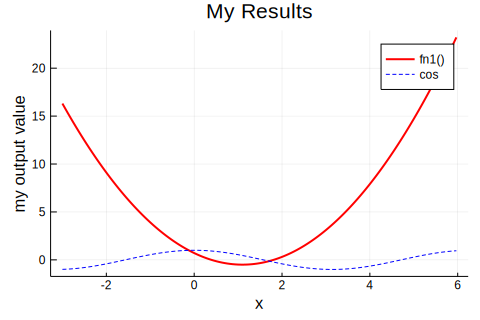

In [17]:
x = -3:6/99:6 

p1 = plot(x,fn1.(x),color=:red,linewidth=2,label="fn1()")
plot!(x,cos.(x),color=:blue,line=(:dash),label="cos")
title!("My Results")
xlabel!("x")
ylabel!("my output value")

# Types: Integers, Floats, Bools and Others

Julia has many different types of variables: signed integers (like 2 or -5), floating point numbers (2.0 and -5.1), bools (false/true), bitarrays (similar to bools, but with more efficient use of memory), strings ("hello"), Dates (2017-04-23) and many more types.

## Integers and Floats

In [18]:
a = 2                   #integer, Int (Int64 on most machines)
b = 2.0                 #floating point, (Float64 on most machines)
A = [1,2]
B = [1.0,2.0]

println("Finding the type of a, b, A and B:")
println(typeof(a)," ",typeof(b)," ",typeof(A)," ",typeof(B))

Finding the type of a, b, A and B:
Int64 Float64 Array{Int64,1} Array{Float64,1}


## Bools and BitArrays

Bools are "true" or "false". BitArrays are (more memory efficient) versions of this.

In [19]:
c = 2 > 1.1
C = A .> 1.5        #A is an array, so C is too

println("Finding the type of c and C:")
println(typeof(c)," ",typeof(C))

Finding the type of c and C:
Bool BitArray{1}


## Calculations with Mixed Types

A calculation like "integer" + "float" works and the type of the result will be a float (the more flexible type). Similarly, "bool" + "integer" will give an integer. These promotion rules make it easy to have mixed types in calculations, and also provide a simple way of converting a variable from one type to another. (There are also an explicit convert() function that might be quicker.)

In [20]:
println(1+2.0)                #integer + Float
println((1>0) + 2)            #bool + integer

3.0
3


## Arrays of Arrays (or other types)

You can store very different things (a mixture of numbers, matrices, strings) in an array. For instance, if `x1` is a vector and `x2` is a string, then `[x1,x2]` puts them into a vector.

In [21]:
x1 = 1:10
x2 = "And Ezra Pound and T.S. Eliot fighting in the captain's tower..."
x3 = rand(4,3)
x  = [x1,x2,x3]

println("x[2] is: ",x[2])

x[2] is: And Ezra Pound and T.S. Eliot fighting in the captain's tower...
